**Import Tools & Libraries**

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

**Loading Data CSV**

In [73]:
data = pd.read_csv("/content/drive/MyDrive/Pollution_Dataset.csv")

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


**Exploratory Data Analysis**

In [74]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [75]:
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [77]:
data.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [78]:
data.duplicated().sum()

0

In [79]:
data["Air Quality"].value_counts()

,count
Air Quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


**Data Preprocessing**

In [80]:
# scaler = StandardScaler()
# feature_scaled = scaler.fit_transform(data.drop(columns="Air Quality"))
# feature_scaled = pd.DataFrame(feature_scaled)

# print(feature_scaled)

In [81]:
encoder = LabelEncoder()
data['Air Quality'] = encoder.fit_transform(data['Air Quality'])

print(data['Air Quality'])

0       2
1       2
2       2
3       0
4       0
       ..
4995    1
4996    2
4997    2
4998    0
4999    2
Name: Air Quality, Length: 5000, dtype: int64


**Data Preparation**

In [86]:
X = data.drop(columns="Air Quality")
y = data["Air Quality"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Initialization**

In [92]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def algorithm(X_train, X_test, y_train, y_test):
  models = {
      "Logistic Regression": LogisticRegression(max_iter = 1000),
      "K-Nearest Neighbors": KNeighborsClassifier(),
      "Support Vector Machine": SVC(probability = True),
      "Random Forest": RandomForestClassifier(random_state = 42),
      "Gradient Boosting": GradientBoostingClassifier(random_state = 42)
  }

  for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Prediction': y_pred
    }

    print(f"{model_name} - Accuracy", accuracy)
    print(classification_report(y_test, y_pred))

In [ ]:
results = {}

In [93]:
algorithm(X_train, X_test, y_train, y_test)

Logistic Regression - Accuracy 0.859
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       409
           1       0.71      0.65      0.68       111
           2       0.86      0.89      0.88       294
           3       0.71      0.68      0.69       186

    accuracy                           0.86      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.86      0.86      0.86      1000

K-Nearest Neighbors - Accuracy 0.783
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       409
           1       0.73      0.46      0.56       111
           2       0.75      0.78      0.76       294
           3       0.56      0.58      0.57       186

    accuracy                           0.78      1000
   macro avg       0.74      0.70      0.71      1000
weighted avg       0.78      0.78      0.78      1000

Support Vector Machine - Accuracy 0.758
              pr

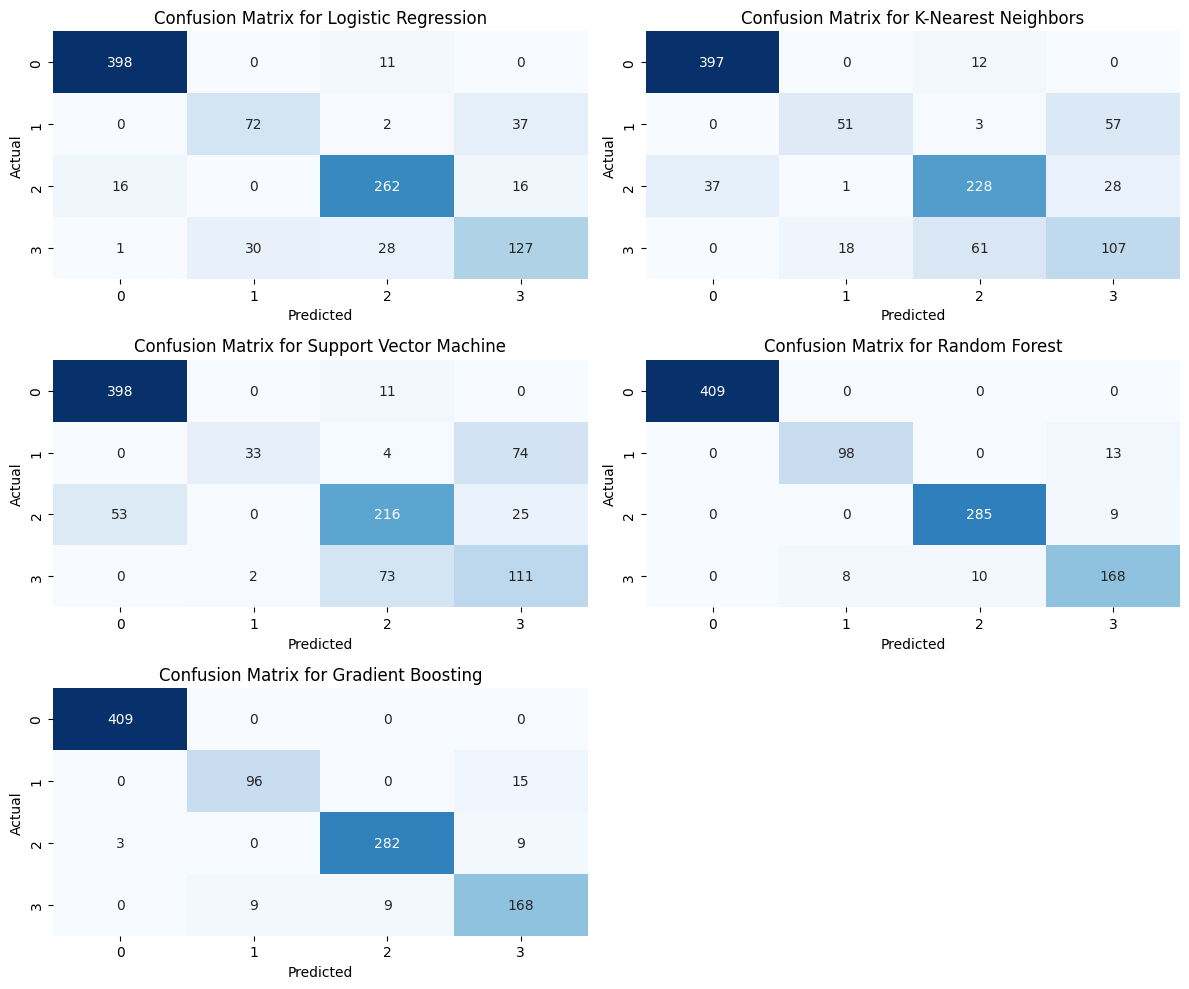

In [96]:
plt.figure(figsize=(12, 10))
for i, (model_name, result) in enumerate(results.items(), start=1):
        cm = confusion_matrix(y_test, result['Prediction'])
        plt.subplot(3, 2, i)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
plt.tight_layout()
plt.show()